In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from thermal_ofc import ThermalOFC

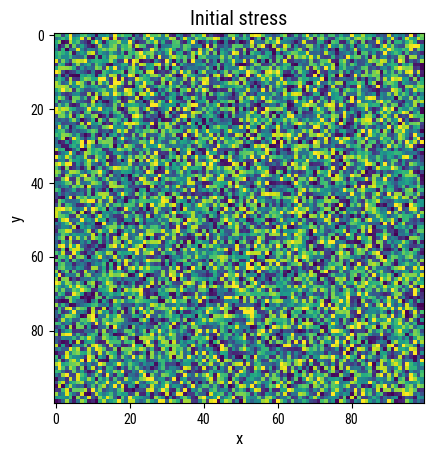

In [14]:
# Create model
model = ThermalOFC(Nx=100, d=5e-4)

# Show model
fig, ax = plt.subplots()
ax.set_title("Initial stress")
ax.set_xlabel("x")
ax.set_ylabel("y")
cax = ax.imshow(model.stress, cmap='viridis', vmin=0, vmax=1)
plt.show()

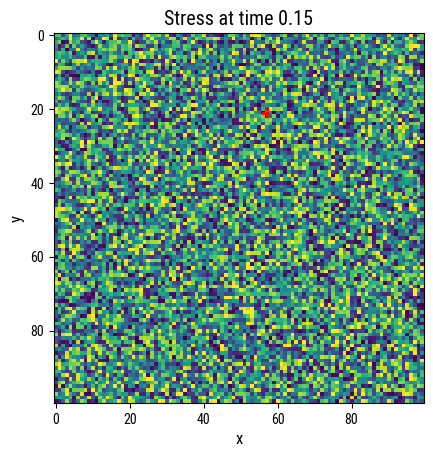

In [ ]:
# Step model
event, time = model.step()
mean_stress = [model.stress.mean()]  # record mean stress


fig, ax = plt.subplots()
ax.set_title("Stress at time {:.2f}".format(time))
ax.set_xlabel("x")
ax.set_ylabel("y")
cax = ax.imshow(model.stress, cmap='viridis', vmin=0, vmax=1)

# Show event
for (ii, jj) in zip(event["ii"], event["jj"]):
    ax.plot(jj, ii, 'rs', markersize=2)

plt.show()

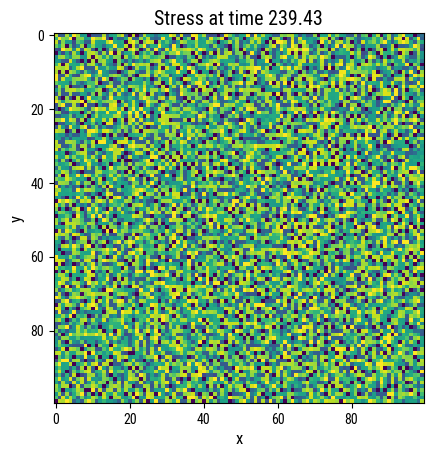

In [19]:
# Run model for some time
N_ev = 10_000
events = []

for iev in range(N_ev):
    print("Event {}/{}".format(iev+1, N_ev), end='\r')
    event, time = model.step()
    
    events.append(event)
    mean_stress.append(model.stress.mean())

fig, ax = plt.subplots()
ax.set_title("Stress at time {:.2f}".format(time))
ax.set_xlabel("x")
ax.set_ylabel("y")
cax = ax.imshow(model.stress, cmap='viridis', vmin=0, vmax=1)
plt.show()

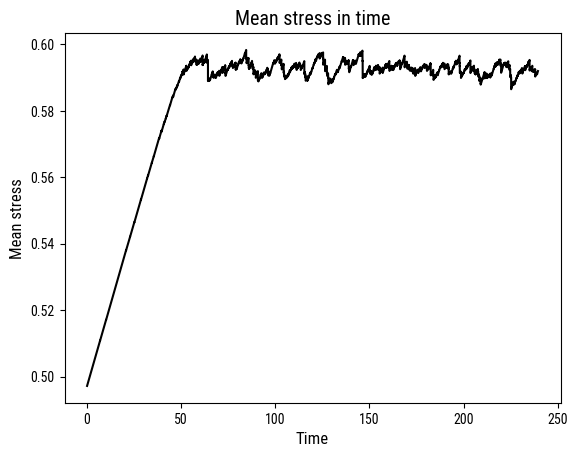

In [20]:
# Stress in time
time = np.array([ev["time"] for ev in events])
mean_stress = np.array(mean_stress)

fig, ax = plt.subplots()
ax.set_title("Mean stress in time")
ax.set_xlabel("Time")
ax.set_ylabel("Mean stress")
ax.plot(time, mean_stress[1:], 'k-')
plt.show()

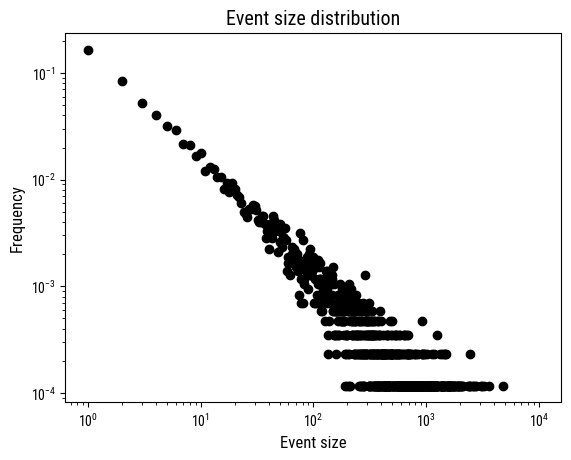

In [ ]:
# Distribution of event sizes
bins = np.linspace(0, len(model.stress)**2, len(model.stress)**2+1)-0.5
hist, _ = np.histogram([len(ev["ii"]) for ev in events if ev["time"] > 50], bins=bins, density=True)

fig, ax = plt.subplots()
ax.set_title("Event size distribution")
ax.set_xlabel("Event size")
ax.set_ylabel("Frequency")
ax.plot(bins[:-1]+0.5, hist, 'ko')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()